## A First look at the Data

### Import the necessary modules
Below are the required Python modules to be imported

In [1]:
import mne
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import array
from pprint import pprint
import json
import os.path as op
from mne_bids import (
    BIDSPath,
    make_dataset_description,
    print_dir_tree,
    read_raw_bids,
    write_meg_calibration,
    write_meg_crosstalk,
    write_raw_bids,
)
from mne_bids.stats import count_events

#### The resampled data is saved as per the BIDS Format in the Sub1_BIDS folder. To import the data in this workspace the following steps will be followed.

#### File overview

The chapter relies on the file (embedded in the BIDS structure):

< BIDS_ROOT >/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_meg.fif

#### Specify your BIDS parameters along with the BIDS folder path

In [4]:
subject = '01'  
session = '01'  
task = 'SpAtt'
run = '01'  
meg_suffix = 'meg'
meg_extension = '.fif'
events_suffix = 'events'
events_extension = '.tsv'

data_path='/home/rakshita/rds_folders/Sproject3/OPM_data'
bids_root = op.join(data_path, "Sub1_BIDS")
bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=meg_suffix, extension=meg_extension, root=bids_root)

#### Import the raw ( <a>  *_.fif  </a>) file into the current workspace

In [5]:
raw = read_raw_bids(bids_path=bids_path, verbose=False, 
                     extra_params={'preload':True})

#### Inspecting at the data

 To get some basic information from the ( <a>  *_.fif  </a>) file write:


In [6]:
print(raw)

<Raw | sub-01_ses-01_task-SpAtt_run-01_meg.fif, 71 x 2443460 (2443.5 s), ~1.29 GB, data loaded>


The 1.29 GB refers to the size of the data set. The 2443.5 s is the recording time. 
As the resampling rate was 1000 Hz, this results in 2443460 samples recorded in 71 channels. These channels include the magnetometers, triggers channels etc.

##### To get some additional information:


In [7]:
print(raw.info)

<Info | 18 non-empty values
 bads: []
 ch_names: L102_bz-s73, L104_bz-s80, L106_bz-s84, L108_bz-s77, L110_bz-s76, ...
 chs: 70 Magnetometers, 1 Stimulus
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dig: 6 items (3 Cardinal, 3 HPI)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 gantry_angle: 0.0
 highpass: 0.0 Hz
 line_freq: 0.0
 lowpass: 250.0 Hz
 meas_date: 1997-06-23 16:12:26 UTC
 meas_id: 4 items (dict)
 nchan: 71
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 3 items (dict)
 xplotter_layout: None
>


This information shows important parameters of the dataset. 
    
The sampling frequency was 1000 Hz (sfreq). 
The data were lowpass filtered at 250.0 Hz  prior to the re-sampling. 
The experimenter is anonymized and the other metadata(e.g. meas_date) associated with recording is not meaningful as to comply with GDPR rules.

#### The data object (raw) allows for a simple inspection of the data by calculating the spectra:

In [8]:
n_fft = 2000
raw_PSD = raw.compute_psd(method="welch", fmin=1, fmax=120, picks="mag", n_fft=n_fft, n_overlap=int(n_fft/2))

Effective window size : 2.000 (s)


A standard Welch method is applied here. The data are divided into sections being 2 s long (2000 samples) with a 1 s overlap (1000 samples). This results in a 0.5 Hz resolution Prior to calculating the FFT of each section a Hamming taper is multiplied.

To plot the data write:


Plotting power spectral density (dB=True).


/home/rakshita/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


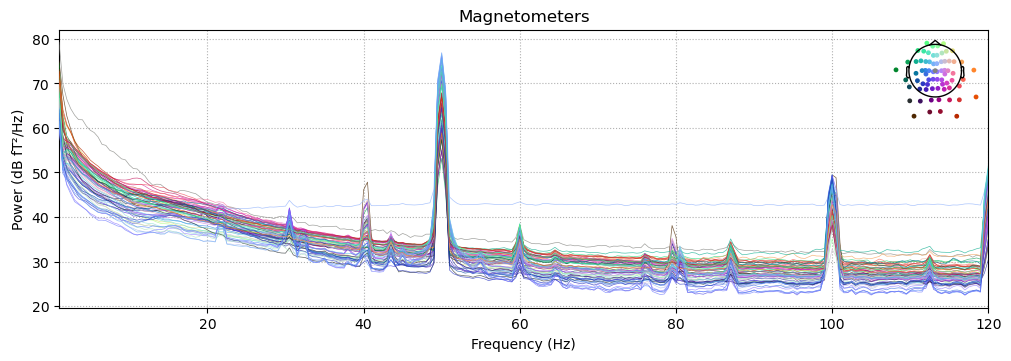

In [9]:
# The line below enables inline plotting in Jupyter Notebooks, displaying plots below code cells.
%matplotlib inline  
raw_PSD.plot();

Note the 50 Hz line noise. The frequency of the line noise is 50 Hz in European countries including Russia and Asian countries like India, China whereas it is 60 in South Korea as well as South and North America. In Japan it can be either 50 or 60 Hz depending on the region.

#### To show the raw data using the interactive functions of the plotting tool write:

In [10]:
%matplotlib qt
raw.plot(duration=10, title='Raw')

Using qt as 2D backend.


Channels marked as bad:
none


This will open the plot in a new window. Use the arrow keys to move over channels and time. Click on the help button for more information.